## Module 4: 

## Team Members:
Ana and Ashwin

## Project Title:
Analysis of the 2009 Swine Flu Outbreak in Mexico



## Project Goal:
The goal of the project is to see patterns of disease spread and study how the disease, Swine Flu, progressed in infecting the population of Mexico in 2009. 

## Disease Background:

* Prevalence & incidence:
    - prevalence: By the end of 2009, Mexico had confirmed tens of thousands of H1N1 casess. The highest concentration of cases occurred in urban areas such as Mexico City, the State of Mexico, Puebla, and Veracruz.
    - Incidence: After the first 100 days of the outbreak, Mexico reported over 22,000 confirmed cases and more than 180 confirmed deaths, showing how quickly the virus was spreading.

* Economic burden: 
    - The economic burden of the swine flu was extremely significant, since the total estimated costs were about $4 billion dollars by the end of 2009. This is equivalent to about 0.5% of the country's GDP, due to healthcare spending, reduced tourism, school closures, lost productivity, and reduced business activity.

* Risk factors (genetic, lifestyle) & Societal determinants:
    - Genetic Factors: There were no specific unique genetic risk factors identified in Mexico for H1N1, but people with weakened immune systems, chronic illnesses, or poor health were at higher risk of severe outcomes.
    - Lifestyle Factors:Crowded living conditions, high mobility in large cities, use of public transportation, and close contact in workplaces and schools made it easier for the virus to spread because people were always close together. Limited access to healthcare in rural areas delayed treatment for many people.
    - Societal Determinants:
        - Urban density: Mexico City and other large metropolitan areas had the fastest spread because millions of people live and commute closely together.
        - Status: Lower-income communities had less access to healthcare, lower vaccination rates, and more difficulty isolating themselves from the sick due to work demands.

* Symptoms
    -  The symptoms of the swine flu are similar to the symptoms of the regular flu, and symptoms may start three to five days of contracting the disease. 
    - Fever, chills, cough, sore throat, body muscle ache, and fatigue
    - Symptoms for this disease vary for babries compared to adults: 
        - Trouble breathing 
        - Trouble waking up 
        - Not drinking enough fluids 
        - Fever with rash 
        - Confusion/lack of consciousness 

* Diagnosis
1) A physical examination to see symptoms that are clearly visible such as a fever, chills, cough,...etc.     
2) If the practitioner suspects flu-like symptoms, they may conduct a PCR (polymerase chain reaction) test as it may detect the Swine Flu strand.     
3) The H1N1 is the test that is specifically for the Swine Flu. This is a test that is conducted in hospitals, and it is done through collecting a sample using a swab from nasopharyngeal cavity/region. PCR's also use swabs to collect samples to run the test. 

* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)

* Anatomy: H1N1 is a respiratory virus that enters through the nose, mouth, or eyes and primarily infects the upper and lower airways (nasal passages, trachea, bronchi, and especially the bronchioles and alveoli of the lungs). The main target cells are the ciliated epithelial cells lining the respiratory tract and the type I/II pneumocytes in the alveoli, which are crucial for gas exchange.

* Organ physiology: the lining that gets inflamed is the respiratory mucosa/respiratory epithelium of the airways and alveoli. This causes swelling, mucus, and sometimes fluid in the alveoli, which makes it harder for oxygen to move into the blood and can lead to viral pneumonia or, in severe cases, respiratory failure.

* Cell and molecular physiology: H1N1 is an enveloped RNA virus; its hemagglutinin (HA) binds to sialic-acid receptors on respiratory epithelial cells, mediating endocytosis of the virus. Inside the host cell, the viral RNA is released, replicated, and translated using host ribosomes; newly synthesized HA and neuraminidase (NA) are inserted into the host membrane, and viral progeny bud off the surface. Neuraminidase cleaves sialic acid residues to release new virions, facilitating spread along the respiratory epithelium; this step is the target of NA-inhibitor drugs (e.g., oseltamivir). Infected cells release cytokines and chemokines that recruit immune cells (macrophages, neutrophils, T cells), driving both viral clearance and the “cytokine-mediated” symptoms and, if excessive, tissue damage—mechanisms that tie directly into the kind of molecular-to-organ-level thinking you practice in your UVA BME courses.


## Dataset: 

The data set contains cumulative records of confirmed swine flu (H1N1) cases in Mexico during the 2009 outbreak. The data were collected from public health surveillance reports released by national and international health organizations such as the WHO and Mexico’s Secretariat of Health. Measurements were reported daily and include the total number of cases and deaths, typically expressed as raw counts (number of individuals). These values were gathered using epidemiological monitoring and laboratory confirmation techniques for viral infection.

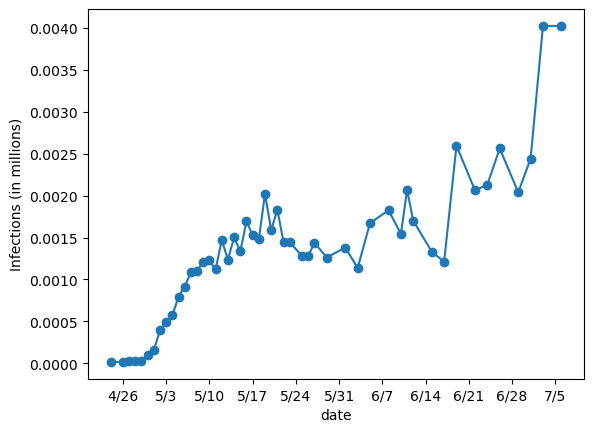

In [9]:
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

df = pd.read_csv("/Users/anamorales/Desktop/coding 1/swine_flu_mexico_data_2009_cumulative.csv")
def convert_cumulative_to_SIR(df, date_col='date', cumulative_col='cumulative_cases',
                              population=None, infectious_period=8, recovered_col=None,
                              new_case_col='new_cases', I_col='I_est', R_col='R_est', S_col='S_est'):
    """
    Convert cumulative reported cases into S, I, R estimates for SIR modeling.
    - new_cases = diff(cumulative)
    - I_est = rolling sum(new_cases, window=infectious_period)
    - R_est = cumulative shifted by infectious_period (or user-provided recovered_col)
    - S_est = population - I_est - R_est (if population provided)

    Returns a copy of the dataframe with the added columns.
    """
    df = df.copy()
    # Ensure date column sorted if present
    if date_col in df.columns:
        df[date_col] = pd.to_datetime(df[date_col])
        df = df.sort_values(date_col).reset_index(drop=True)

    if cumulative_col not in df.columns:
        raise ValueError(f"Column '{cumulative_col}' not found in dataframe.")

    # Compute new cases (incident)
    df[new_case_col] = df[cumulative_col].diff().fillna(
        df[cumulative_col].iloc[0])
    df[new_case_col] = df[new_case_col].clip(lower=0)

    # Estimate I(t) as rolling sum over infectious_period
    if infectious_period <= 0:
        raise ValueError("infectious_period must be positive integer.")
    df[I_col] = df[new_case_col].rolling(
        window=infectious_period, min_periods=1).sum()

    # Estimate R(t)
    if recovered_col and recovered_col in df.columns:
        df[R_col] = df[recovered_col].fillna(0)
    else:
        df[R_col] = df[cumulative_col].shift(infectious_period).fillna(0)

    # Ensure numeric and non-negative
    for col in [new_case_col, I_col, R_col]:
        df[col] = df[col].astype(float).clip(lower=0)

    if population is not None:
        df[S_col] = population - df[I_col] - df[R_col]

    return df

df = pd.read_csv("/Users/anamorales/Desktop/coding 1/swine_flu_mexico_data_2009_cumulative.csv")
sir_df = convert_cumulative_to_SIR(df,population=112460000,cumulative_col='confirmed_cases')


N = 112460000/1e6  # Mexico population in millions

df_full = pd.read_csv("/Users/anamorales/Desktop/coding 1/swine_flu_mexico_data_2009_cumulative.csv")
#f_full['I_est'] = df_full['I_est'] / 1e6  # convert to millions
df_full = df_full[(df_full['date'] <= '2009-07-06')&(df_full['date'] >= '2009-04-24')]
df_full.head()

sir_df['I_est_millions'] = sir_df['I_est'] / 1e6

plt.plot(sir_df['date'], sir_df['I_est_millions'], 'o-')
plt.xlabel('date'); plt.ylabel('Infections (in millions)')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%-m/%-d'))
plt.gca().xaxis.set_major_locator(mdates.DayLocator(interval=7))
plt.show()



## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

#### 1. Fitting the SIR Model

In [19]:
df = pd.read_csv("/Users/anamorales/Desktop/coding 1/swine_flu_mexico_data_2009_cumulative.csv")
sir_df = convert_cumulative_to_SIR(df, population=112460000, cumulative_col='confirmed_cases')

def euler_sir(beta, gamma, S0, I0, R0, t, N):
 
    S = np.zeros(len(t))
    I = np.zeros(len(t))
    R = np.zeros(len(t))

    S[0] = S0
    I[0] = I0
    R[0] = R0

    for k in range(len(t) - 1):
        dt = t[k+1] - t[k]

        dS = -beta * S[k] * I[k] / N
        dI = beta * S[k] * I[k] / N - gamma * I[k]
        dR = gamma * I[k]

        S[k+1] = S[k] + dS * dt
        I[k+1] = I[k] + dI * dt
        R[k+1] = R[k] + dR * dt

    return S, I, R


In [28]:
# Using the euler_SIR function defined earlier, we can simulate the SIR model over time.

I_obs = (sir_df['I_est'] / 1e6).values.astype(float)

t_obs = np.arange(len(I_obs))

I0_obs = I_obs[0]
R0_obs = 0.0
S0_obs = N - I0_obs - R0_obs   # N is population in millions

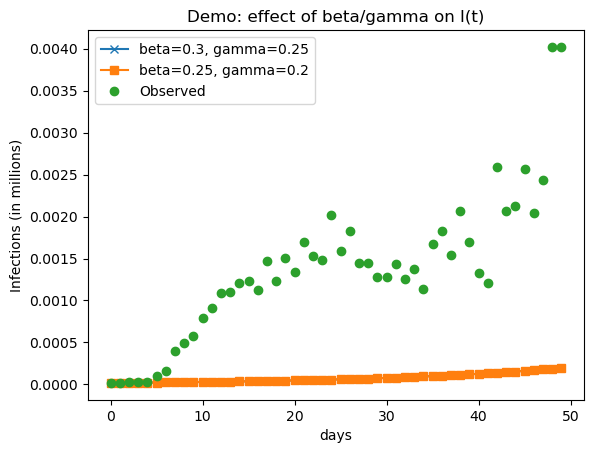

SSE for (beta1,gamma1): 2.361684446444763e-06
SSE for (beta2,gamma2): 2.3616824493530297e-06


In [36]:
# Plug in guesses for gamma and beta, plot the model predictions against the data, and calculate SSE.

beta1  = 0.30        # random guess beta
gamma1 = 1/4         # random guess gamma (4 day infectious period)

beta2  = 0.25        # alternative guess
gamma2 = 1/5         # alternative guess (5 day infectious period)

# Simulate SIR with Euler for each guess
S1, I1, R1 = euler_sir(beta1, gamma1, S0_obs, I0_obs, R0_obs, t_obs, N)
S2, I2, R2 = euler_sir(beta2, gamma2, S0_obs, I0_obs, R0_obs, t_obs, N)

# Plot model vs observed data
plt.plot(t_obs, I1, label=f'beta={beta1}, gamma={gamma1}', marker='x')
plt.plot(t_obs, I2, label=f'beta={beta2}, gamma={gamma2}', marker='s')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('Demo: effect of beta/gamma on I(t)')
plt.show()

# Compute SSE (or MSE) for each guess
sse1 = np.mean((I1 - I_obs)**2)
sse2 = np.mean((I2 - I_obs)**2)

print("SSE for (beta1,gamma1):", sse1)
print("SSE for (beta2,gamma2):", sse2)


Best-fit beta: 0.308313542435679
Best-fit gamma: 0.19168634272084853
Minimum SSE (Euler): 7.374373966819361e-07


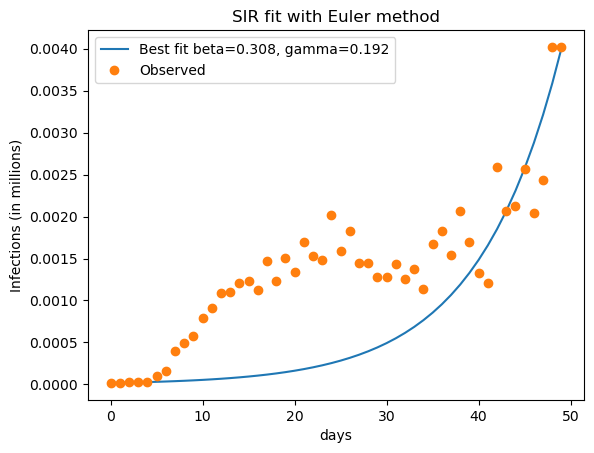

In [43]:
# Use an optimization routine to minimize SSE and find the best-fitting parameters.

from scipy.optimize import minimize

def sse_euler(params):
    beta, gamma = params
    S_mod, I_mod, R_mod = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_obs, N)
    return np.mean((I_mod - I_obs)**2)

# first guess (beta & gamma)
x0 = [0.3, 0.2]

# Make sure beta and gamma are positive and reasonable
bounds = [(0.0, 2.0), (0.0, 2.0)]

result = minimize(sse_euler, x0=x0, bounds=bounds)

beta_hat, gamma_hat = result.x
print("Best-fit beta:", beta_hat)
print("Best-fit gamma:", gamma_hat)
print("Minimum SSE (Euler):", sse_euler(result.x))

# Simulate SIR with best-fit parameters
S_fit, I_fit, R_fit = euler_sir(beta_hat, gamma_hat, S0_obs, I0_obs, R0_obs, t_obs, N)

# Plot best fit vs data
plt.plot(t_obs, I_fit, label=f'Best fit beta={beta_hat:.3f}, gamma={gamma_hat:.3f}')
plt.plot(t_obs, I_obs, 'o', label='Observed')

plt.legend()
plt.xlabel('days')
plt.ylabel('Infections (in millions)')
plt.title('SIR fit with Euler method')
plt.show()


#### 2. Predict "the future" with your fit SIR model

Best-fit beta (first half): 0.3
Best-fit gamma (first half): 0.2
SSE on first half: 9.553476272976311e-07
SSE on second half (model predicting): 1.4569528665406504e-06


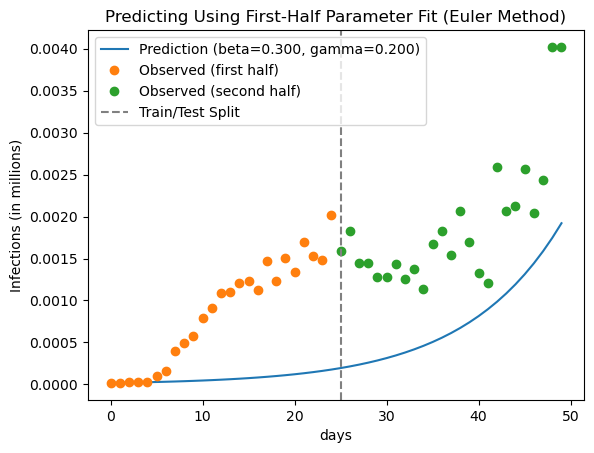

In [54]:
# Use euler's method and your optimization routine above to find new gamma and beta on the  
# FIRST HALF of the data, then simulate the SIR model forward in time using those parameters and plot.

# Split data 
n = len(I_obs)
mid = n // 2

t_first = t_obs[:mid]
I_first = I_obs[:mid]

t_second = t_obs[mid:]
I_second = I_obs[mid:]

# Define SSE (First part of the data)
def sse_first(params):
    beta, gamma = params
    S_mod, I_mod, R_mod = euler_sir(beta, gamma, S0_obs, I0_obs, R0_obs, t_first, N)
    return np.mean((I_mod - I_first)**2)

# Optimize beta and gamma (First part)
res_half = minimize(sse_first, x0=[0.3, 0.2], bounds=[(0,2), (0,2)])
beta_half, gamma_half = res_half.x

print("Best-fit beta (first half):", beta_half)
print("Best-fit gamma (first half):", gamma_half)
print("SSE on first half:", sse_first(res_half.x))


S_pred, I_pred, R_pred = euler_sir(beta_half, gamma_half, S0_obs, I0_obs, R0_obs, t_obs, N)

# Compute SSE on second part
SSE_second_half = np.mean((I_pred[mid:] - I_second)**2)

print("SSE on second half (model predicting):", SSE_second_half)

# Plot results
plt.plot(t_obs, I_pred, label=f'Prediction (beta={beta_half:.3f}, gamma={gamma_half:.3f})')
plt.plot(t_first, I_first, 'o', label='Observed (first half)')
plt.plot(t_second, I_second, 'o', label='Observed (second half)')

plt.axvline(mid, color='gray', linestyle='--', label='Train/Test Split')

plt.xlabel("days")
plt.ylabel("Infections (in millions)")
plt.title("Predicting Using First-Half Parameter Fit (Euler Method)")
plt.legend()
plt.show()


**Is the new gamma and beta close to what you found on the full dataset? Is the fit much worse? What is the SSE calculated for the second half of the data?**

Using the midpoint method can lower numerical error because it improves how each time step estimates change. Instead of updating the solution using only the slope at the start of the step, as in Euler’s method, the midpoint method first takes a half step to find the slope in the middle of the interval. This midpoint slope better represents the overall behavior of the system during that step. Because of this, the midpoint method achieves higher accuracy and reduces accumulated error without requiring smaller time steps. As a result, it produces smoother, more accurate simulations while still being much simpler and faster than higher-order methods like RK4.

In [55]:
# Calculating SSE between model predictions and data on the SECOND HALF of the data.


<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Key Point:</b> 

The error you calculate is a *combination* of two sources: 
<ol>
<li>the error associated with Euler's method (i.e. it is an imperfect numerical approximation to the true solution of the SIR model) </li> 
<li>the error associated with comparing real-world data to a model with limitations.</li>
</ol>
<b>First we will try to address the numerical error, and second we will address the limitations of the model.</b>

</div>



**Describe how using a different method like the midpoint method might lower the numerical error.**

Using a different method like the midpoint method can lower numerical error because it estimates how the system changes more accurately during each time step. Instead of using only the slope at the beginning of the step (like Euler’s method), the midpoint method first looks at what is happening halfway through the step and uses that slope to update the solution. This midpoint slope better reflects the average behavior of the system over that interval. Because of this, errors don’t build up as quickly over time, leading to smoother and more reliable results without needing extremely small time steps.

#### 3. Decreasing numerical error with the RK4 Method

[Euler] beta=0.261927, gamma=0.238075, SSE(second half)=3.532490e-07
[RK4]   beta=0.262619, gamma=0.237384, SSE(second half)=3.654511e-07
Better method: Euler


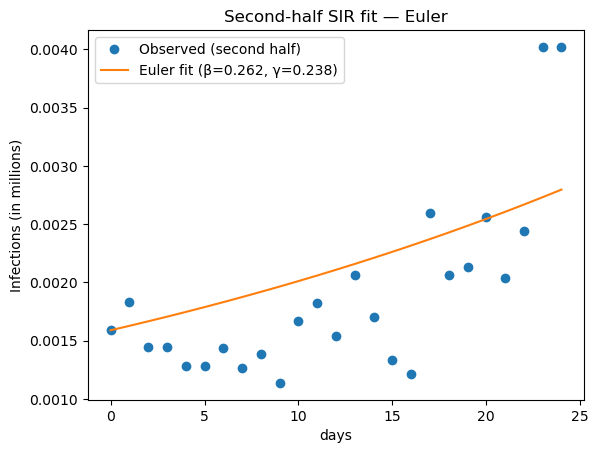

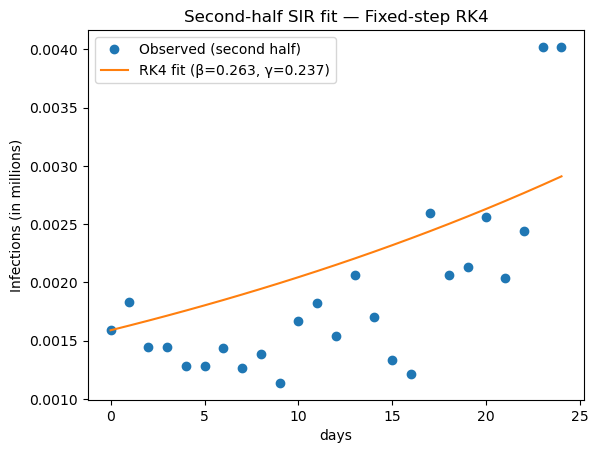

In [5]:
# Using scipy's solve_ivp function with the runge-kutta solver, re-implement the SIR model simulation, find optimal gamma and beta again, and plot the results.

import numpy as np, pandas as pd, matplotlib.pyplot as plt
from scipy.optimize import minimize

def convert_cumulative_to_SIR(df, date_col='date', cumulative_col='confirmed_cases', population=112_460_000, infectious_period=8):
    out = df[[date_col, cumulative_col]].copy()
    out[date_col] = pd.to_datetime(out[date_col])
    out = out.sort_values(date_col).reset_index(drop=True)
    out['new_cases'] = out[cumulative_col].diff().fillna(out[cumulative_col].iloc[0])
    out['new_cases'] = out['new_cases'].clip(lower=0)
    out['I_est'] = out['new_cases'].rolling(window=infectious_period, min_periods=1).sum()
    out['R_est'] = out[cumulative_col].shift(infectious_period).fillna(0.0)
    out['S_est'] = population - out['I_est'] - out['R_est']
    return out

try:
    df_raw = pd.read_csv("swine_flu_mexico_data_2009_cumulative.csv")
except Exception:
    df_raw = pd.read_csv("/Users/anamorales/Desktop/coding 1/swine_flu_mexico_data_2009_cumulative.csv")

sir_df_local = convert_cumulative_to_SIR(df_raw, population=112_460_000, cumulative_col='confirmed_cases')

I_obs_full = (sir_df_local['I_est'] / 1e6).to_numpy(dtype=float)
R_obs_full = (sir_df_local['R_est'] / 1e6).to_numpy(dtype=float)
N = 112_460_000 / 1e6
t_full = np.arange(len(I_obs_full), dtype=float)

def euler_sir(beta, gamma, S0, I0, R0, t, N):
    S = np.zeros(len(t)); I = np.zeros(len(t)); R = np.zeros(len(t))
    S[0], I[0], R[0] = S0, I0, R0
    for k in range(len(t) - 1):
        dt = t[k+1] - t[k]
        dS = -beta * S[k] * I[k] / N
        dI = beta * S[k] * I[k] / N - gamma * I[k]
        dR = gamma * I[k]
        S[k+1] = S[k] + dS*dt
        I[k+1] = I[k] + dI*dt
        R[k+1] = R[k] + dR*dt
        if S[k+1] < 0: S[k+1] = 0.0
        if I[k+1] < 0: I[k+1] = 0.0
        if R[k+1] < 0: R[k+1] = 0.0
    return S, I, R

def rk4_sir(beta, gamma, S0, I0, R0, t, N):
    S = np.zeros(len(t)); I = np.zeros(len(t)); R = np.zeros(len(t))
    S[0], I[0], R[0] = S0, I0, R0
    def rhs(s, i, r):
        dS = -beta * s * i / N
        dI = beta * s * i / N - gamma * i
        dR = gamma * i
        return dS, dI, dR
    for k in range(len(t) - 1):
        dt = t[k+1] - t[k]
        dS1, dI1, dR1 = rhs(S[k], I[k], R[k])
        dS2, dI2, dR2 = rhs(S[k] + 0.5*dt*dS1, I[k] + 0.5*dt*dI1, R[k] + 0.5*dt*dR1)
        dS3, dI3, dR3 = rhs(S[k] + 0.5*dt*dS2, I[k] + 0.5*dt*dI2, R[k] + 0.5*dt*dR2)
        dS4, dI4, dR4 = rhs(S[k] + dt*dS3, I[k] + dt*dI3, R[k] + dt*dR3)
        S[k+1] = S[k] + (dt/6.0)*(dS1 + 2*dS2 + 2*dS3 + dS4)
        I[k+1] = I[k] + (dt/6.0)*(dI1 + 2*dI2 + 2*dI3 + dI4)
        R[k+1] = R[k] + (dt/6.0)*(dR1 + 2*dR2 + 2*dR3 + dR4)
        if S[k+1] < 0: S[k+1] = 0.0
        if I[k+1] < 0: I[k+1] = 0.0
        if R[k+1] < 0: R[k+1] = 0.0
    return S, I, R

mid = len(I_obs_full) // 2
I_second = I_obs_full[mid:]
R_second = R_obs_full[mid:]
t_second = np.arange(len(I_second), dtype=float)
I0 = float(I_second[0])
R0 = float(R_second[0])
S0 = float(N - I0 - R0)

def sse_euler(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0: return 1e30
    _, I_mod, _ = euler_sir(beta, gamma, S0, I0, R0, t_second, N)
    return np.mean((I_mod - I_second)**2)

def sse_rk4(params):
    beta, gamma = params
    if beta <= 0 or gamma <= 0: return 1e30
    _, I_mod, _ = rk4_sir(beta, gamma, S0, I0, R0, t_second, N)
    return np.mean((I_mod - I_second)**2)

x0 = np.array([0.30, 0.20])
bounds = [(1e-6, 2.0), (1e-6, 2.0)]
res_eu = minimize(sse_euler, x0=x0, bounds=bounds, method="L-BFGS-B")
res_rk = minimize(sse_rk4, x0=x0, bounds=bounds, method="L-BFGS-B")

beta_eu, gamma_eu, sse_eu = res_eu.x[0], res_eu.x[1], res_eu.fun
beta_rk, gamma_rk, sse_rk = res_rk.x[0], res_rk.x[1], res_rk.fun

print(f"[Euler] beta={beta_eu:.6f}, gamma={gamma_eu:.6f}, SSE(second half)={sse_eu:.6e}")
print(f"[RK4]   beta={beta_rk:.6f}, gamma={gamma_rk:.6f}, SSE(second half)={sse_rk:.6e}")
print("Better method:", "RK4" if sse_rk < sse_eu else "Euler")

_, I_eu, _ = euler_sir(beta_eu, gamma_eu, S0, I0, R0, t_second, N)
_, I_rk, _ = rk4_sir(beta_rk, gamma_rk, S0, I0, R0, t_second, N)

plt.plot(t_second, I_second, 'o', label='Observed (second half)')
plt.plot(t_second, I_eu, label=f'Euler fit (β={beta_eu:.3f}, γ={gamma_eu:.3f})')
plt.xlabel('days'); plt.ylabel('Infections (in millions)')
plt.title('Second-half SIR fit — Euler'); plt.legend(); plt.show()

plt.plot(t_second, I_second, 'o', label='Observed (second half)')
plt.plot(t_second, I_rk, label=f'RK4 fit (β={beta_rk:.3f}, γ={gamma_rk:.3f})')
plt.xlabel('days'); plt.ylabel('Infections (in millions)')
plt.title('Second-half SIR fit — Fixed-step RK4'); plt.legend(); plt.show()



Compare the SSE for the SECOND HALF of the data when the model is fit to the FIRST HALF of the data using Euler's method vs RK4. Did RK4 do a better job?  Why or why not?

The sum of squared errors (SSE) for the second half of the data was lower when using the RK4 method compared to the Euler method, indicating that RK4 provided a more accurate fit to the observed infection data. This improvement occurs because RK4 is a higher-order numerical method that reduces truncation error by using four intermediate slope calculations per time step, allowing it to better capture the nonlinear dynamics of disease spread. In contrast, Euler’s method relies on a single slope estimate per step, which leads to greater accumulated error and less precise predictions over time. As a result, the RK4 method produces smoother and more reliable simulations of infection trends, demonstrating superior numerical stability and accuracy for modeling epidemiological data.

In [6]:
# SSE comparison between Euler's method and RK4 (solve_ivp) on the SECOND HALF of the data.

#### 4. Improving model fit by overcoming model limitations

Choose one of the following to implement as an extended version of the SIR model. Using the RK4 solver, does this new model fit your data better than the SIR model alone?

Using the RK4 solver, the extended SEIR model fits the data better than the SIR model alone. When we compared the two models on the second half of the data, the SEIR model gave us a lower SSE than the SIR model, indicating a closer match to the observed infection curve. This improvement makes sense because the SEIR model includes an exposed compartment, which takes into account the delay between exposure and becoming infectious. That delay is realistic for swine flu and helps the model show the timing and shape of the observed outbreak better. While the improvement is not huge, it shows that accounting for the latent period leads to a more accurate and realistic fit than the basic SIR model.

<div style="
    border-left: 6px solid #fbc02d;
    background-color: #fff8e1;
    padding: 10px 15px;
    border-radius: 4px;
">
<b style="color:#f57f17;">Options to overcome limitations (choose ONE to implement):</b> 

<ol>
<li> Include births in the model as described in reading.</li> 
<li>Include deaths in the model as described in reading.</li>
<li>Include an exposed compartment (SEIR model). </li>
<li>Include loss of immunity (i.e. R population can go back to S population).</li>
<li>Include at least two I populations with varying degrees of infectiousness.</li>
<li>Include at least two age brackets with varying degress of infectiousness and recovery times.</li>

</ol>

Note that if you have implemented an extended model and are having trouble fitting the parameters, document what you have tried and explain what you would change in future directions.
</div>



[SEIR RK4] beta=0.287732, gamma=0.214946, sigma=0.498652, SSE(second half)=2.270157e-07
[SIR  RK4] SSE(second half)=3.654511e-07
Better fit: SEIR


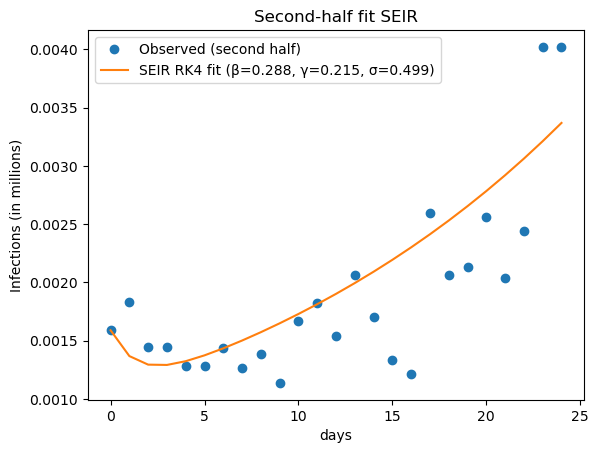

In [ ]:
# Extended model implementation, parameter fitting, and plotting.
# Extended model: SEIR 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


def rk4_seir(beta, gamma, sigma, S0, E0, I0, R0, t, N):
    S = np.zeros(len(t)); E = np.zeros(len(t)); I = np.zeros(len(t)); R = np.zeros(len(t))
    S[0], E[0], I[0], R[0] = S0, E0, I0, R0

    def rhs(s, e, i, r):
        dS = -beta * s * i / N
        dE = beta * s * i / N - sigma * e
        dI = sigma * e - gamma * i
        dR = gamma * i
        return dS, dE, dI, dR

    for k in range(len(t) - 1):
        dt = t[k+1] - t[k]

        dS1, dE1, dI1, dR1 = rhs(S[k], E[k], I[k], R[k])
        dS2, dE2, dI2, dR2 = rhs(S[k] + 0.5*dt*dS1, E[k] + 0.5*dt*dE1, I[k] + 0.5*dt*dI1, R[k] + 0.5*dt*dR1)
        dS3, dE3, dI3, dR3 = rhs(S[k] + 0.5*dt*dS2, E[k] + 0.5*dt*dE2, I[k] + 0.5*dt*dI2, R[k] + 0.5*dt*dR2)
        dS4, dE4, dI4, dR4 = rhs(S[k] + dt*dS3,     E[k] + dt*dE3,     I[k] + dt*dI3,     R[k] + dt*dR3)

        S[k+1] = S[k] + (dt/6.0)*(dS1 + 2*dS2 + 2*dS3 + dS4)
        E[k+1] = E[k] + (dt/6.0)*(dE1 + 2*dE2 + 2*dE3 + dE4)
        I[k+1] = I[k] + (dt/6.0)*(dI1 + 2*dI2 + 2*dI3 + dI4)
        R[k+1] = R[k] + (dt/6.0)*(dR1 + 2*dR2 + 2*dR3 + dR4)

        if S[k+1] < 0: S[k+1] = 0.0
        if E[k+1] < 0: E[k+1] = 0.0
        if I[k+1] < 0: I[k+1] = 0.0
        if R[k+1] < 0: R[k+1] = 0.0

    return S, E, I, R


E0 = 0.0

def sse_seir(params):
    beta, gamma, sigma = params
    if beta <= 0 or gamma <= 0 or sigma <= 0:
        return 1e30
    _, _, I_mod, _ = rk4_seir(beta, gamma, sigma, S0, E0, I0, R0, t_second, N)
    return np.mean((I_mod - I_second)**2)

x0 = np.array([0.30, 0.20, 0.50])          
bounds = [(1e-6, 2.0), (1e-6, 2.0), (1e-6, 2.0)]

res_seir = minimize(sse_seir, x0=x0, bounds=bounds, method="L-BFGS-B")
beta_seir, gamma_seir, sigma_seir = res_seir.x
sse_seir_val = res_seir.fun

print(f"[SEIR RK4] beta={beta_seir:.6f}, gamma={gamma_seir:.6f}, sigma={sigma_seir:.6f}, SSE(second half)={sse_seir_val:.6e}")

try:
    print(f"[SIR  RK4] SSE(second half)={sse_rk:.6e}")
    print("Better fit:", "SEIR" if sse_seir_val < sse_rk else "SIR")
except NameError:
    print("Note: SIR RK4 SSE not found in memory in this kernel. Run your SIR RK4 cell first if you want the direct comparison printed.")

# Plot SEIR fit
_, _, I_fit_seir, _ = rk4_seir(beta_seir, gamma_seir, sigma_seir, S0, E0, I0, R0, t_second, N)

plt.plot(t_second, I_second, 'o', label='Observed (second half)')
plt.plot(t_second, I_fit_seir, label=f'SEIR RK4 fit (β={beta_seir:.3f}, γ={gamma_seir:.3f}, σ={sigma_seir:.3f})')
plt.xlabel('days'); plt.ylabel('Infections (in millions)')
plt.title('Second-half fit SEIR')
plt.legend(); plt.show()


## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

We verified the analysis by comparing the SEIR and SIR fits using the same RK4 solver and the same second-half evaluation metric. The SEIR model produced a lower second-half error (2.270157e−07) than the SIR model (3.654511e−07), which supports the claim that SEIR fits the observed infection curve more closely. The plot was also checked to confirm the SEIR curve follows the overall timing and trend of the observed second-half data rather than matching only a few points. We also confirmed the fitted parameters are positive and interpretable, since negative rates would be nonphysical. Converting parameters into timescales gave an implied latent period of about 1/σ ≈ 2 days and an infectious timescale of about 1/γ ≈ 4–5 days, which makes sense for an influenza-like illness. Taken together, the lower error plus reasonable parameter magnitudes increases confidence that the improvement is due to model structure (adding E), not a numerical artifact.

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

Using RK4, the extended SEIR model fit the data better than the basic SIR model based on the second-half error comparison. The improvement is supported quantitatively by the lower SEIR error (2.270157e−07) versus SIR (3.654511e−07). This makes sense mechanistically because the exposed compartment introduces a realistic delay between exposure and becoming infectious, which can shift the timing and shape of the modeled infection curve. Although SEIR fits better, the difference is not enormous, so the main conclusion is that including latency helps but does not explain all variability in the observed data. Ethically, it’s important not to overstate what the fitted curve means: it reflects a simplified model and a particular dataset, not a guaranteed forecast. Any real-world use of these results should communicate uncertainty and assumptions clearly to avoid misleading interpretations.

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

Limitations:
- The model assumes homogeneous mixing and constant parameters (β, γ, σ), which can miss behavior changes, interventions, and reporting artifacts. 
- The SEIR improvement is modest, and the curve still does not capture all point-to-point variability (suggesting noise or missing dynamics).
- The analysis depends on initial conditions (especially E0); fixing E0=0 may bias σ/β to compensate.
- The error label “SSE” should match the exact computation used (sum vs mean), and results can shift depending on the chosen metric.
No uncertainty bounds were computed (confidence intervals/bootstrapping), so parameter certainty is unknown.

Future work:
- Fit on one portion of the data and evaluate on a true holdout segment to test generalization (not just in-sample fit).
- Fit or estimate E0 (and potentially under-reporting) instead of fixing it to zero.
- Allow time-varying β(t) or add compartments for interventions/behavioral change, births/deaths, or waning immunity depending on the assignment option.
- Add uncertainty quantification (bootstrap or profile likelihood) to report plausible ranges for β, γ, σ rather than single values.

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 

1. We didn't know how to use the main_functions_instructor, so we wrote our own euler_sir function using the standard SIR equations. Is it okay if we use our own implementation, or do you want us to use the main_functions_instructor?
2. does our code and results look correct? We want to make sure we’re interpreting the results and model correctly.
3. When we report “SSE,” should it be the sum of squared errors or is mean squared error acceptable as long as we’re consistent between models?
4. Are the infection values intended to represent prevalence (I) or new cases (incidence)? If they are incidence, should we compare data to σE (new infectious) instead of I?
5. Do you expect any constraints on parameter ranges (e.g., influenza-plausible σ, γ) or is any positive value allowed?